## Feature Dimention Reduction Using LDA and PCA with Python | Principal Component Analysis in Feature Selection | KGP Talkie 

Watch Full Playlist: https://www.youtube.com/playlist?list=PLc2rvfiptPSQYzmDIFuq2PqN2n28ZjxDH

### What is LDA (Linear Discriminant Analysis)? 

The idea behind LDA is simple. Mathematically speaking, we need to find a new feature space to project the data in order to maximize classes separability

Linear Discriminant Analysis is a supervised algorithm as it takes the class label into consideration. It is a way to reduce ‘dimensionality’ while at the same time preserving as much of the class discrimination information as possible.

LDA helps you find the boundaries around clusters of classes. It projects your data points on a line so that your clusters are as separated as possible, with each cluster having a relative (close) distance to a centroid.

So the question arises- how are these clusters are defined and how do we get the reduced feature set in case of LDA?

Basically LDA finds a centroid of each class datapoints. For example with thirteen different features LDA will find the centroid of each of its class using the thirteen different feature dataset. Now on the basis of this, it determines a new dimension which is nothing but an axis which should satisfy two criteria:
1.	Maximize the distance between the centroid of each class.
2.	Minimize the variation (which LDA calls scatter and is represented by s2), within each category.

### What is PCA 

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

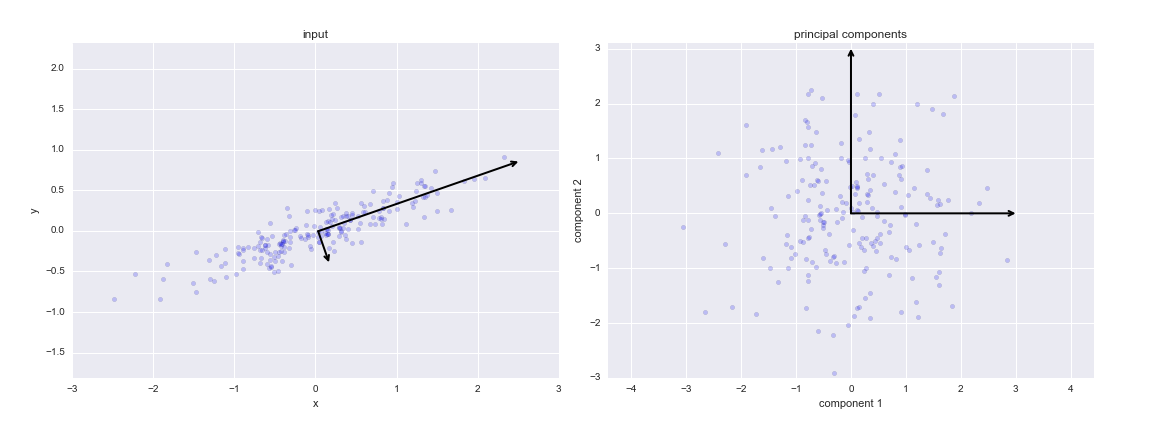

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels), and you will learn how to achieve this practically using Python in later sections of this tutorial!

According to Wikipedia, PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

## When to use PCA 

Data Visualization: When working on any data related problem, the challenge in today's world is the sheer volume of data, and the variables/features that define that data. To solve a problem where data is the key, you need extensive data exploration like finding out how the variables are correlated or understanding the distribution of a few variables. Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible.

Speeding Machine Learning (ML) Algorithm: Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.

## How to do PCA 

We can calculate a Principal Component Analysis on a dataset using the PCA() class in the scikit-learn library. The benefit of this approach is that once the projection is calculated, it can be applied to new data again and again quite easily.

When creating the class, the number of components can be specified as a parameter.

The class is first fit on a dataset by calling the fit() function, and then the original dataset or other data can be projected into a subspace with the chosen number of dimensions by calling the transform() function.

Once fit, the eigenvalues and principal components can be accessed on the PCA class via the explained_variance_ and components_ attributes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [15]:
data = pd.read_csv('santander.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [16]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Remove Constant, Quasi Constant and Duplicate Features

In [20]:
#remove constant and quasi constant features
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [22]:
X_train_filter.shape, X_test_filter.shape

((16000, 245), (4000, 245))

In [23]:
#remove duplicate features
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [24]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [25]:
X_train_T.duplicated().sum()

18

In [26]:
duplicated_features = X_train_T.duplicated()

In [27]:
features_to_keep = [not index for index in duplicated_features]

X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [29]:
scaler = StandardScaler().fit(X_train_unique)
X_train_unique = scaler.transform(X_train_unique)
X_test_unique = scaler.transform(X_test_unique)

In [38]:
X_train_unique = pd.DataFrame(X_train_unique)
X_test_unique = pd.DataFrame(X_test_unique)

In [39]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

### Removal of correlated Feature 

In [40]:
corrmat = X_train_unique.corr()

In [111]:
#find correlated features
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

corr_features = get_correlation(X_train_unique, 0.70)
print('correlated features: ', len(set(corr_features)) )    

correlated features:  148


In [112]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features, axis = 1)

In [113]:
X_train_uncorr.shape, X_test_uncorr.shape

((16000, 79), (4000, 79))

## Feature Dimention Reduction by LDA or Is it a Classifier

In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [115]:
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_uncorr, y_train)
X_test_lda = lda.transform(X_test_uncorr)

In [116]:
X_train_lda.shape, X_test_lda.shape

((16000, 1), (4000, 1))

In [117]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [118]:
%%time
run_randomForest(X_train_lda, X_test_lda, y_train, y_test)

Accuracy on test set: 
0.93025
CPU times: user 3.35 s, sys: 64.3 ms, total: 3.41 s
Wall time: 1.1 s


In [119]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 3.41 s, sys: 82 ms, total: 3.49 s
Wall time: 1.2 s


In [120]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 6.68 s, sys: 143 ms, total: 6.83 s
Wall time: 2.01 s


### Feature Reduction by PCA? 

In [121]:
from sklearn.decomposition import PCA

In [130]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X_train_uncorr)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [131]:
X_train_pca = pca.transform(X_train_uncorr)
X_test_pca = pca.transform(X_test_uncorr)
X_train_pca.shape, X_test_pca.shape

((16000, 2), (4000, 2))

In [132]:
%%time
run_randomForest(X_train_pca, X_test_pca, y_train, y_test)

Accuracy on test set: 
0.956
CPU times: user 3.06 s, sys: 67.9 ms, total: 3.12 s
Wall time: 999 ms


In [133]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 6.75 s, sys: 138 ms, total: 6.89 s
Wall time: 2.13 s


In [134]:
X_train_uncorr.shape

(16000, 79)

In [ ]:
for component in range(1,30):
    pca = PCA(n_components=component, random_state=42)
    pca.fit(X_train_uncorr)
    X_train_pca = pca.transform(X_train_uncorr)
    X_test_pca = pca.transform(X_test_uncorr)
    print('Selected Components: ', component)
    run_randomForest(X_train_pca, X_test_pca, y_train, y_test)
    print()

Selected Components:  1
Accuracy on test set: 
0.92375

Selected Components:  2
Accuracy on test set: 
0.956

Selected Components:  3
Accuracy on test set: 
0.95675

Selected Components:  4
Accuracy on test set: 
0.95825

Selected Components:  5
